## Load packages

In [640]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models  import Phrases
import gensim
from sklearn.externals import joblib
from gensim.models import Doc2Vec
from scipy import spatial
import datetime
from collections import defaultdict, Counter
import itertools
from datetime import datetime
import pickle
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
from nltk.stem import SnowballStemmer
from string import punctuation
import time
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"


### I build dictionary to save Date and Performance and time consuming

In [66]:
daily_performance={}


## Buld DoctoVec property by entire opinion lab dataset from Jan 2017 to yesterday. 

In [1404]:
last_data=pd.read_csv('/Users/Azi/Downloads/formatted_jan3.csv',encoding='latin-1',low_memory=False)


In [1405]:
last_data['Date']=pd.to_datetime(last_data['Submission Date'])
last_data['Year'] = last_data['Date'].dt.year
year_2019=last_data[(last_data['Year']==2019)] 


#### Read last dataset for OPL in 2018

In [1406]:


opl_df2018last=pd.read_csv('/Users/Azi/Downloads/formatted_new30.csv',encoding='latin-1',low_memory=False)

df1= pd.concat([year_2019,opl_df2018last], sort=True)

#### Read last dataset for OPL in 2017

In [1245]:



opl_2017=pd.read_csv("/Users/Azi/Citibank/OpinionLab_012017_122017.csv",encoding='latin-1',low_memory=False)

df1= pd.concat([opl_2017,opl_df2018last], sort=True)
df1[0:3]

,Browser Name,CCSID,CommentID,Comments,Device Type,OS Name,Overall Rating,Source,Submission Date
0,Safari,NaN,00000005-91cc-eeec-0000-015958c09448,You must credit payments in a timely manner or...,Mobile Phone,iOS,2,Opinion Lab,01/01/2017 12:38 AM
1,Chrome Mobile,NaN,00000005-91cd-6c4d-0000-015958c9a0b0,Too many error messages,Mobile Phone,Android,3,Opinion Lab,01/01/2017 12:48 AM
2,Safari,NaN,00000005-91ce-05d5-0000-015958d90a00,Sucks,Mobile Phone,iOS,1,Opinion Lab,01/01/2017 01:05 AM


In [ ]:
def preprocess(row, sw= False):
    if isinstance(row, str):
        s = row.lower()
        s = ' '.join(w for w in s.split(' ') if "'" not in w)
        s = strip_punctuation(s)
        if sw:
        	s = remove_stopwords(s)
        for w in drop_words:
            s = s.replace(w,'')
        t = tokenizer.tokenize(s) 
        t = [lemmatizer.lemmatize(token) for token in t]
        t = [token for token in t if not token.isnumeric()]
        t = [token for token in t if len(token) > 1]

        return(t)
    else: 
        print(row)
        return ('')
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
#Create Corpus for training gensim bigram/trigram models
phraser_corp = df1.Comments.apply(lambda x: preprocess(x, False)).values
bigram = Phrases(phraser_corp, min_count=30)
trigram = Phrases([bigram[p] for p in phraser_corp], min_count =30)



### Cleaning comments and bulid train corpus

In [1407]:
def build_train_corpus(opl):
    print ("Size of initail Dataset",opl.shape)
    opl.dropna()
    print (opl.shape[0])

    opl.drop_duplicates(subset=None, keep='first', inplace=True)
    opl = opl[opl.Comments.str.count(' ')>3]
    print (opl.shape[0])
    print ("Size of Dataset after removing the nan value and duplicates",opl.shape)
    opl=opl[~opl.Comments.str.contains("Farhat Deeba")]
    opl=opl[~opl.Comments.str.contains("ï¼ xì ¼ê²½ì xë ï¼")]
    opl=opl[~opl.Comments.str.contains("ï¼")]
    opl=opl[~opl.Comments.str.contains("Farhat Deeba")]
    opl=opl[~opl.Comments.str.contains("Ã¯Â¼Â‚xÃ¬Â‹ÂœÃªÂ°Â")]
    opl=opl[~opl.Comments.str.contains("¼ê²½ìƒ‰Â·ë")]
    opl=opl[~opl.Comments.str.contains("xxzxzdrddxxxxxxxf")]
    opl=opl[~opl.Comments.str.contains("¼ê²½ì")] 
    opl=opl[~opl.Comments.str.contains("Facebook | Facebook")] 

    print ("Size of Dataset after removing some noises such as Farhat Deeba",opl.shape)
    opl["Comments"] = opl["Comments"].apply(lambda x: ''.join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))

    opl['Date']=pd.to_datetime(opl['Submission Date'])
    max_date=max (opl.Date)
    min_date=min (opl.Date)
    print ('OPL Date is from:', min_date, 'to', max_date )
    opl['Month'] = opl['Date'].dt.month
    opl['Year'] = opl['Date'].dt.year

    opl['Month']= opl['Month'].astype(str)
    look_up = {'1': 'Jan', '2': 'Feb', '3': 'Mar', '4':
           'Apr', '5': 'May', '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

    opl['Month'] = opl['Month'].apply(lambda x: look_up[x])
    year_2018=opl[(opl['Year']==2019)] 
    year_2018=opl[(opl['Year']==2018)] 
    year_2017=opl[(opl['Year']==2017)] 
    
    opl=opl[(opl["Date"]<'2019-01-20')]
    



    print (max (opl.Date))

    print ("Month in", year_2019["Year"].unique(),year_2019['Month'].unique())
    print ("Month in", year_2018["Year"].unique(),year_2018['Month'].unique())
    print ("Month in",year_2017["Year"].unique() , year_2017['Month'].unique())
    opl['Doc_NLP'] = opl['Comments'].apply(lambda x: preprocess(x, False))
    opl['Comments_NLP'] = opl['Comments'].apply(lambda x: preprocess(x, True))
    opl['Comments_NLP'] = opl['Comments_NLP'].apply(lambda x: ' '.join(x))
    corpus = opl.Doc_NLP.values
    training_corpus = [gensim.models.doc2vec.TaggedDocument(i,[j]) for i,j in zip(corpus,range(len(corpus)))]
    print ("Size of trainging corpus:", len (training_corpus))
    return training_corpus, opl



In [1381]:
drop_words = []

In [1408]:
training_corpus, opl=build_train_corpus(df1)

Size of initail Dataset (71122, 11)
71122
65959
Size of Dataset after removing the nan value and duplicates (65959, 11)
Size of Dataset after removing some noises such as Farhat Deeba (65907, 11)
OPL Date is from: 2017-12-30 00:10:00 to 2019-01-03 23:59:00
2019-01-03 23:59:00
Month in [2019] ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Month in [2018] ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Month in [2017] ['Dec']
Size of trainging corpus: 65907


In [334]:
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
#Create Corpus for training gensim bigram/trigram models
phraser_corp = df1.Comments.apply(lambda x: preprocess(x, False)).values
bigram = Phrases(phraser_corp, min_count=30)
trigram = Phrases([bigram[p] for p in phraser_corp], min_count =30)


nan
nan


### Training Doc2Vec by gensim and save the Doc2vec by max Date with distingushied name

In [1410]:
import time
start_time=time.clock()
sz = 100 
win =5
neg=5
it = 10
workers = 4

#Train model using gradient descent
model_db = gensim.models.doc2vec.Doc2Vec(size=sz, window= win, min_count=2, negative=neg, hs=0, iter = it, dbow_words =0,
 workers = workers,  dm_mean=1,learn_words=True )
model_db.build_vocab(training_corpus)
model_db.build_vocab(training_corpus, update=True)
%time model_db.train(training_corpus, total_examples=model_db.corpus_count ,epochs=model_db.iter)
alpha = 0.025
learn_words=True
min_alpha = 0.0002
num_epochs = 5# 50 for medallia
alpha_delta = (alpha - min_alpha) / num_epochs

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/models/doc2vec.py:531: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/models/doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationW

CPU times: user 1min 6s, sys: 24.1 s, total: 1min 30s
Wall time: 56.4 s


#### We can increase the number of the epochs

In [1411]:
for epoch in range(num_epochs):
    print(epoch)
    np.random.shuffle(training_corpus)
    model_db.alpha = alpha
    model_db.min_alpha = alpha
    model_db.train(training_corpus, total_examples=model_db.corpus_count, epochs=model_db.iter)
    alpha -= alpha_delta 


max_DATE=max(opl.Date)
filename = 'FunctionDoc2Vec-%s'%max_DATE.strftime('%Y-%m-%d')
model_db.save(filename)



#model_db.save('OPLtest')

0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


1
2
3
4


### Size of the Train Corpus

In [1356]:
model_db.corpus_count

65429

### Generate helper function to take actual comment full text and find doctag along with Date and Sentiment

In [228]:
def comment_tag_score(model_db,top_k,tokens,df):
    
    Comment_Date=df[["Comments","Submission Date", 'Comments_NLP','Date']].reset_index()
    Comment_Date.dropna()
    X=model_db.docvecs.vectors_docs
    print ("Size of the Doc2Vec property is",len(X)) 

    np.savetxt('doc_vect_test.csv', X, delimiter=',') 
    doctovec=pd.read_csv('doc_vect_test.csv',  header=None)
    dans_vector_Comment = pd.concat([Comment_Date, doctovec], axis=1).reset_index()
    dans_vector_Comment=dans_vector_Comment.rename(columns={"index":"Comment_index"})
    dans_vector_Comment=dans_vector_Comment.rename(columns={"level_0":"Comment_index_1"})

    print ("Tag_Document")
    tag_document= pd.DataFrame(training_corpus).reset_index()
    tag_document_tag=tag_document.sort_values('tags').reset_index()
    new_datafram = pd.concat([tag_document_tag, dans_vector_Comment], axis=1)
    new_datafram = new_datafram.drop('index', 1)
    new_datafram = new_datafram.drop('level_0', 1)
    inferred_docvec = model_db.infer_vector(tokens, alpha=0.025, min_alpha=0.00001, steps=2000000)
    sims = model_db.docvecs.most_similar([inferred_docvec],topn=top_k )
    
    test = dict(sims)
    tag=list (test.keys()) 
    #print ('tag',tag)
    #print (sims)
    analogy_doc = pd.DataFrame(sims)
    
    similar_doc=new_datafram[new_datafram['Comment_index_1'].isin(tag)] 
    test = dict(sims)

    analogy_doc = pd.DataFrame(sims)
    analogy_doc.columns=["Comment_index_1", "Score"]
    #print (analogy_doc[0:4])

    Simliar_comment_tag=new_datafram[new_datafram['Comment_index_1'].isin(tag)]
    #print ("Simliar_comment_tag",Simliar_comment_tag[0:5])
    Similar_Comment_Date=Simliar_comment_tag[['Comment_index_1','words','tags', 'Comments','Submission Date','Comments_NLP','Date']]
    result = pd.merge(Similar_Comment_Date, analogy_doc, on='Comment_index_1')
    #print (result)
    #similar_document_score=result.sort_values('Score',  ascending=[False]).reset_index()
    similar_document_score=result.sort_values(['Date', 'Score'], ascending=[False, False]).reset_index()
    similar_document_score = similar_document_score.drop('index', 1)
    similar_document_score.rename(columns = {'Comment_index_1':'Comment_Index'},inplace=True)
    #print(tokens)
    pickle_in = open("/Users/Azi/Citibank/pickle_model.pkl","rb")
    load_model_sentiment = pickle.load(pickle_in) 
    my_tags = ['negative','neutral','positive']

    new_sentiment= load_model_sentiment.predict(similar_document_score.Comments)
    print (new_sentiment[0:2])
    similar_document_score['sentiment']=new_sentiment

    return similar_document_score
    

In [1412]:
len (training_corpus),len (opl)

(65907, 65907)

In [1256]:
def prediction_evaluation(new_review):
    
    print ("Load the model object by Pickel, Model is trained by entire Opoinion lab data set from Jan 2017 to Oct 2018")
    print ("\n")
    #if __name__=='__main__':
        #with open('pickle_model.pkl', 'rb') as f:
            #users = pickle.load(f)
        
        
    pickle_in = open("/Users/Azi/Citibank/pickle_model.pkl","rb")
    load_model_sentiment = pickle.load(pickle_in) 
    my_tags = ['negative','neutral','positive']

    new_sentiment= load_model_sentiment.predict(new_review)
    new_review['new_sentiment']=new_sentiment
    new_review.to_csv("C:/Users/ae07525/Desktop/full_OPL.csv")

    print('accuracy %s' % accuracy_score( new_review.feeling, new_sentiment))
    print ('Confution Matrix')
    print(classification_report(new_review.feeling, new_sentiment,target_names=my_tags))



    new_review["Sentimin_feeling"]=new_sentiment
    print ("Distribution of ",new_review.groupby('feeling').size())
    print (new_review[0:3])
    print ("Saving new_senmtimet_label in CSV format")
    new_review.to_csv('New_text_classification.csv')
    
    
    
    
    return new_review
    

In [1385]:

token='bonus not received'

In [1386]:
tokens=token.split()
print (tokens)
top_k =20
tag_date_commen=comment_tag_score(model_db,top_k,tokens, opl)
tag_date_commen_score=tag_date_commen[['Comment_Index','Comments','Date','Score','sentiment']]
tag_date_commen_score


['bonus', 'not', 'received']
Size of the Doc2Vec property is 65228
Tag_Document


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['negative' 'negative']


,Comment_Index,Comments,Date,Score,sentiment
0,35498,It stated if i opened an account on line i wou...,2018-12-26 02:07:00,0.383813,negative
1,34307,Credit for return not posted soon enough on ap...,2018-12-14 13:47:00,0.387087,negative
2,33749,I never got my sign up bonus,2018-12-10 07:42:00,0.455954,negative
3,62889,I have not gotten a response regarding my bonu...,2018-12-05 10:43:00,0.505958,negative
4,62220,"Always receive the best customer services , gu...",2018-11-28 20:08:00,0.381428,negative
5,58658,Question about my checking/saving bonus,2018-10-26 15:51:00,0.405631,negative
6,27400,I have not been able to log into the app at al...,2018-10-08 10:55:00,0.411902,negative
7,26985,It takes too long for things to come out of pe...,2018-10-04 12:42:00,0.423987,negative
8,26647,Could not find what the x% quarterly spending ...,2018-09-30 18:35:00,0.382706,negative
9,54185,I requested xxxx statements- I have not received,2018-09-05 11:49:00,0.436794,negative


In [1416]:
number_sample=25
def evalute_doc2vec(model_db,number_sample):
    #tag_vector_comment_1=defaultdict(list)
    mean_certainty=[]
    certianty=[]
    #right_doc=0 

    for i in range(number_sample):
        tag_vector_comment_1=defaultdict(list)
        right_doc=0 
        print ("loop",i)
        chosen_idx = np.random.choice(model_db.docvecs.count,replace=True,size=1000)
        for num in chosen_idx:
            tag_1=training_corpus[num].tags[0]
            comment=training_corpus[num].words
            tag_vector_comment_1[tag_1].append(comment)
            #print (" Building Dic of random sample", len (tag_vector_comment_1))
  
        for tag,item in tag_vector_comment_1.items():
            #print (" Inside the Dic")
            #print ("tag from training corpus", tag)        
            text = list(itertools.chain(*item))
            #print ("Len of the dic of random sample)", len (tag_vector_comment_1)) 

            inferred_docvec = model_db.infer_vector(text)
            most_sims_vector = model_db.docvecs.most_similar([inferred_docvec],topn=10 )

            sim_vector = dict(most_sims_vector)
            tag_similariti=sim_vector.keys()
            list_tag_sim=list (tag_similariti)

            if tag in (list_tag_sim):
                #print ("Exit!")
                right_doc += 1
            else:
                #print ("No Exit")
                right_doc += 0
                    
        #print ("right_doc", right_doc)  
        accuracy_chain=right_doc/len ( tag_vector_comment_1)
        print ("accuracy_chain", accuracy_chain)
        certianty.append(accuracy_chain)
        print ('certainty of first 200 random samples from training dataset')
        print (certianty)
    mean_certainty=sum(certianty) / number_sample      
    return mean_certainty

### Evaluating the Doc2vec

In [1417]:


mean_certainty= evalute_doc2vec(model_db,number_sample)
time_consuming= time.process_time() - start_time


mean_certainty

loop 0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


accuracy_chain 0.8375378405650857
certainty of first 200 random samples from training dataset
[0.8375378405650857]
loop 1
accuracy_chain 0.8371859296482412
certainty of first 200 random samples from training dataset
[0.8375378405650857, 0.8371859296482412]
loop 2
accuracy_chain 0.7989949748743719
certainty of first 200 random samples from training dataset
[0.8375378405650857, 0.8371859296482412, 0.7989949748743719]
loop 3
accuracy_chain 0.8439073514602216
certainty of first 200 random samples from training dataset
[0.8375378405650857, 0.8371859296482412, 0.7989949748743719, 0.8439073514602216]
loop 4
accuracy_chain 0.8052208835341366
certainty of first 200 random samples from training dataset
[0.8375378405650857, 0.8371859296482412, 0.7989949748743719, 0.8439073514602216, 0.8052208835341366]
loop 5
accuracy_chain 0.8245967741935484
certainty of first 200 random samples from training dataset
[0.8375378405650857, 0.8371859296482412, 0.7989949748743719, 0.8439073514602216, 0.8052208835341

accuracy_chain 0.8118712273641852
certainty of first 200 random samples from training dataset
[0.8375378405650857, 0.8371859296482412, 0.7989949748743719, 0.8439073514602216, 0.8052208835341366, 0.8245967741935484, 0.8286290322580645, 0.8094758064516129, 0.8167170191339376, 0.8260869565217391, 0.8244197780020182, 0.8119312436804853, 0.8163471241170535, 0.8125, 0.8254288597376388, 0.8134403209628887, 0.8267875125881168, 0.8323232323232324, 0.8375125376128385, 0.8277945619335347, 0.8102926337033299, 0.8180904522613065, 0.8110552763819096, 0.8353413654618473, 0.8118712273641852]


0.8217395477908538

In [1418]:
time_consuming,mean_certainty

(54757.14108500001, 0.8217395477908538)

In [1419]:
print("Test of the Doc2vec on", 25* 1000, 'samples is',mean_certainty)

Test of the Doc2vec on 25000 samples is 0.8217395477908538


## Load Dictionary by Json File

In [1420]:
with open('data.json', encoding='utf-8') as data_file:
    daily_performance = json.loads(data_file.read())

## Append time traing and Performance to dictionary

In [1400]:
def save_performance_daily_Doc2vec(opl,mean_certainty, time_consuming):
    max_DATE=max(opl.Date)    
    model_date=max_DATE.strftime('%Y-%m-%d')
    print (model_date)
    daily_performance[model_date]=(round(mean_certainty,2),round (time_consuming,2))
    return daily_performance

In [1421]:
daily_time_performance=save_performance_daily_Doc2vec(opl,mean_certainty, time_consuming)

2019-01-03


### Save the updated dictionary in json file

In [1422]:
daily_time_performance

with open('data.json', 'w') as fp:
    json.dump(daily_time_performance, fp)

### Function to load model if the performance of the model is greater that 0.8

In [1423]:


def load_the_Doc2vec(daily_time_performance):
    keymax=max(daily_time_performance)
    keylist = daily_time_performance.keys()
    itemlist = daily_time_performance.values()

    print (itemlist)
    list_key=list(keylist)
    last_day_perforamnce=daily_time_performance[keymax]
    type(last_day_perforamnce)
    firstVal = last_day_perforamnce[0] 
    print (firstVal)
    if firstVal>=0.8:
        print (filename)
        model_db_load= Doc2Vec.load(filename)
        return model_db_load
    else:
        
        for i in list_key:
            find_day_perforamnce=daily_time_performance[i]
            prformance_find=find_day_perforamnce[0]
            if (prformance_find>=0.80):
                filenamenew = 'FunctionDoc2Vec-%s'%i
                print (filenamenew)
                model_db_load= Doc2Vec.load(filenamenew)
                return model_db_load
                            

In [1424]:
model_db_load=load_the_Doc2vec(daily_time_performance)

dict_values([[0.88, 34025.62], [0.9, 35414.82], [0.87, 37350.41], [0.87, 36343.32], [0.86, 33630.36], [0.89, 38359.95], [0.88, 39454.87], [0.87, 40605.31], [0.88, 41980.68], [0.87, 42930.25], [0.89, 43898.91], [0.88, 45693.6], [0.88, 46838.91], [0.88, 47849.7], [0.83, 54240.18], (0.82, 54757.14), [0.84, 52799.93], [0.82, 53541.58]])
0.82
FunctionDoc2Vec-2019-01-03


In [1425]:
print (model_db.corpus_count)
print (model_db_load.corpus_count)

65907
65907


In [ ]:
doc_performance_daily=pd.DataFrame.from_dict(daily_time_performance)
doc_performance_timetraining= doc_performance_daily.T.reset_index()
doc_performance_timetraining.columns=['Date','Performance','TimeTraining_Second']


In [1428]:
doc_performance_daily=doc_performance_timetraining.sort_values(['Date'])
doc_performance_daily

,Date,Performance,TimeTraining_Second
1,2018-12-16,0.90,35414.82
0,2018-12-17,0.88,34025.62
3,2018-12-18,0.87,36343.32
2,2018-12-19,0.87,37350.41
4,2018-12-20,0.86,33630.36
5,2018-12-21,0.89,38359.95
6,2018-12-22,0.88,39454.87
7,2018-12-23,0.87,40605.31
8,2018-12-24,0.88,41980.68
9,2018-12-25,0.87,42930.25


### Tracking the performance of the daily Doc2Vec along with treshhold '0.8'


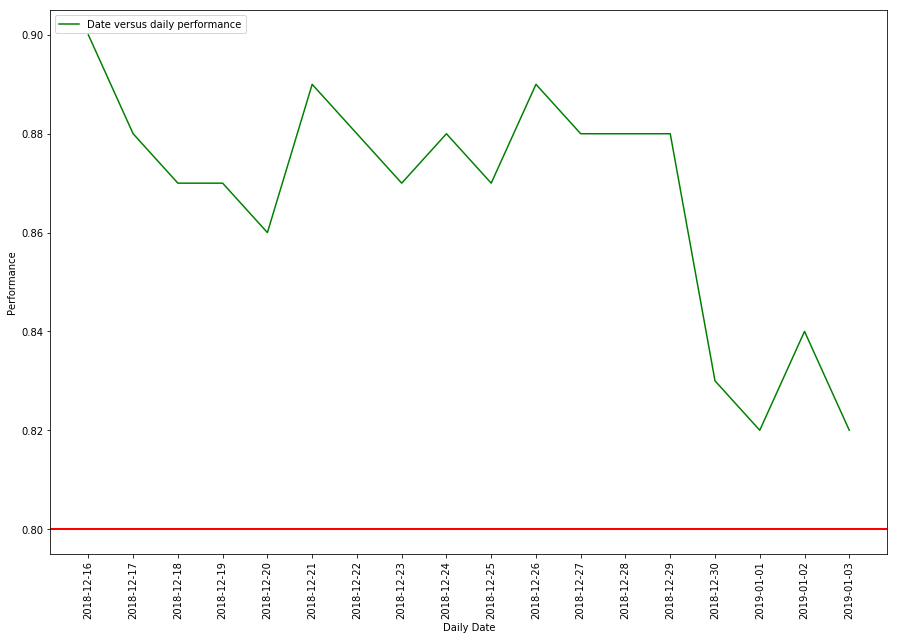

In [1430]:
plt.figure(figsize=(15,10))
plt.plot(doc_performance_daily['Date'],doc_performance_daily['Performance'], color='green', label='Date versus daily performance')
plt.axhline(y=0.80, color='r',linewidth=2)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.xlabel('Daily Date')
plt.ylabel('Performance')
plt.show()